In [80]:
# Import Libraries
import pandas as pd
import numpy as np
import gdown
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [81]:
file_train = '1xPevlKjCSyvxF0pfxaQhDbtl3xjhSJMl'
file_test = '1olOyeDnbabQlgw46e4Ap9jJ3E_hoahEA'

gdown.download(f'https://drive.google.com/uc?id={file_train}', 'train.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={file_test}', 'test.csv', quiet=False)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Downloading...
From: https://drive.google.com/uc?id=1xPevlKjCSyvxF0pfxaQhDbtl3xjhSJMl
To: /content/train.csv
100%|██████████| 1.85M/1.85M [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1olOyeDnbabQlgw46e4Ap9jJ3E_hoahEA
To: /content/test.csv
100%|██████████| 511k/511k [00:00<00:00, 38.8MB/s]


# **PREPROCESSING**

In [98]:
print(train.shape, test.shape)
print(train.head())

(11688, 22) (3400, 21)
                     ID       date cluster_id  electricity_consumption  \
0  cluster_1_2014-01-01 2014-01-01  cluster_1                  358.032   
1  cluster_2_2014-01-01 2014-01-01  cluster_2                  548.247   
2  cluster_3_2014-01-01 2014-01-01  cluster_3                  758.303   
3  cluster_4_2014-01-01 2014-01-01  cluster_4                 1072.077   
4  cluster_1_2014-01-02 2014-01-02  cluster_1                  386.908   

   temperature_2m_max  temperature_2m_min  apparent_temperature_max  \
0                10.8                 4.2                       5.5   
1                12.2                 4.3                       8.6   
2                12.9                -0.8                      10.1   
3                10.8                 4.7                       6.7   
4                10.7                 7.0                       6.6   

   apparent_temperature_min  sunshine_duration  daylight_duration  ...  \
0                       0.4    

In [99]:
train.describe()

,date,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cluster_id_le,month,day,year,temp_range,apparent_temp_range,is_weekend
count,11688,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,2017-12-31 12:00:00,642.313328,18.733385,7.174786,17.215315,4.784608,29302.656241,44070.779592,23.273058,46.383080,202.335554,12.742257,2.428585,1.500000,6.522930,15.729637,2017.500342,11.558599,12.430707,0.285421
min,2014-01-01 00:00:00,207.472000,-1.900000,-10.800000,-8.100000,-15.400000,0.000000,29447.550000,6.800000,13.300000,0.002855,0.333333,0.173333,0.000000,1.000000,1.000000,2014.000000,1.700000,1.900000,0.000000
25%,2016-01-01 00:00:00,414.376000,12.800000,2.500000,10.000000,-1.100000,19104.170833,35150.501667,17.400000,35.300000,134.384708,5.600000,0.990000,0.750000,4.000000,8.000000,2016.000000,8.700000,9.200000,0.000000
50%,2017-12-31 12:00:00,602.672000,18.200000,7.100000,16.400000,4.400000,29917.360000,44185.056667,22.000000,43.900000,219.000000,12.140000,2.156667,1.500000,7.000000,16.000000,2017.500000,11.300000,12.100000,0.000000
75%,2020-01-01 00:00:00,836.034500,24.300000,12.100000,24.000000,10.800000,40697.756667,52997.815833,28.000000,54.700000,281.609519,18.924167,3.616667,2.250000,10.000000,23.000000,2020.000000,14.300000,15.400000,1.000000
max,2021-12-31 00:00:00,1658.348000,40.900000,23.200000,42.600000,23.800000,53498.910000,58501.420000,63.900000,95.626000,360.000000,29.983333,8.133333,3.000000,12.000000,31.000000,2021.000000,27.100000,30.100000,1.000000
std,NaN,287.673473,7.504161,5.960263,9.085303,7.260336,13600.113712,9283.839471,7.993389,15.090596,100.697741,7.588077,1.607845,1.118082,3.448851,8.800469,2.291236,3.789724,4.268820,0.451634


In [100]:
test.describe()

,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cluster_id_le,month,day,year,temp_range,apparent_temp_range,is_weekend
count,3400,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,2023-03-01 12:00:00,18.961500,7.129000,17.426235,4.659794,28386.893019,43536.462394,24.544941,46.350798,200.037026,12.845216,2.462490,1.500000,5.955294,15.691765,2022.711765,11.832500,12.766441,0.287059
min,2022-01-01 00:00:00,-0.500000,-9.900000,-5.200000,-13.900000,0.000000,29445.496667,8.400000,14.800000,0.031158,0.636667,0.170000,0.000000,1.000000,1.000000,2022.000000,2.500000,2.400000,0.000000
25%,2022-08-01 00:00:00,12.900000,2.700000,9.800000,-0.800000,17353.708333,34971.655833,18.600000,36.000000,134.318827,5.615833,0.985833,0.750000,3.000000,8.000000,2022.000000,8.800000,9.300000,0.000000
50%,2023-03-01 12:00:00,17.800000,7.000000,16.000000,4.100000,28889.441667,43325.776667,23.200000,43.900000,213.308826,12.131667,2.076667,1.500000,6.000000,16.000000,2023.000000,11.600000,12.400000,0.000000
75%,2023-09-30 00:00:00,25.225000,12.200000,25.300000,10.825000,40171.849167,51761.820000,29.600000,55.100000,274.307947,19.294167,3.633333,2.250000,9.000000,23.000000,2023.000000,14.600000,16.000000,1.000000
max,2024-04-29 00:00:00,41.000000,20.700000,42.900000,22.200000,53326.583333,58498.340000,69.900000,95.626000,359.641099,29.530000,8.463333,3.000000,12.000000,31.000000,2024.000000,28.200000,30.300000,1.000000
std,NaN,7.943236,6.081648,9.560501,7.360106,14102.638216,9048.358998,8.200494,14.616503,99.141482,7.786489,1.682623,1.118198,3.517251,8.782102,0.698321,4.026892,4.603290,0.452456


In [101]:
tr_null = train.isnull().sum()
ts_null = test.isnull().sum()

print(tr_null)
print(ts_null)

ID                             0
date                           0
cluster_id                     0
electricity_consumption        0
temperature_2m_max             0
temperature_2m_min             0
apparent_temperature_max       0
apparent_temperature_min       0
sunshine_duration              0
daylight_duration              0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
cluster_id_le                  0
month                          0
day                            0
year                           0
temp_range                     0
apparent_temp_range            0
is_weekend                     0
dtype: int64
ID                             0
date                           0
cluster_id                     0
temperature_2m_max             0
temperature_2m_min             0
apparent_temperature_max       0
apparent_temperature_min       0
sunshine_duration             

In [102]:
assert train['ID'].is_unique, "ID train tidak unik!"
assert test['ID'].is_unique, "ID test tidak unik!"

In [103]:
print(train['cluster_id'].unique())

['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']
Categories (4, object): ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']


In [104]:
from sklearn.preprocessing import LabelEncoder

# kalau untuk CatBoost
le = LabelEncoder()
train['cluster_id_le'] = le.fit_transform(train['cluster_id'])
test['cluster_id_le'] = le.transform(test['cluster_id'])

# kalau untuk LGBM/XGB
train_onehot = pd.get_dummies(train, columns=['cluster_id'])
test_onehot = pd.get_dummies(test, columns=['cluster_id'])

In [105]:
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day
test['month'] = pd.to_datetime(test['date']).dt.month
test['day'] = pd.to_datetime(test['date']).dt.day
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [106]:
train['year'] = train['date'].dt.year
test['year'] = test['date'].dt.year

print("Distribusi tahun train:")
print(train['year'].value_counts())

print("Distribusi tahun test:")
print(test['year'].value_counts())

# cek month
print("Distribusi bulan train:")
print(train['month'].value_counts().sort_index())

print("Distribusi bulan test:")
print(test['month'].value_counts().sort_index())

Distribusi tahun train:
year
2016    1464
2020    1464
2015    1460
2014    1460
2017    1460
2018    1460
2019    1460
2021    1460
Name: count, dtype: int64
Distribusi tahun test:
year
2022    1460
2023    1460
2024     480
Name: count, dtype: int64
Distribusi bulan train:
month
1     992
2     904
3     992
4     960
5     992
6     960
7     992
8     992
9     960
10    992
11    960
12    992
Name: count, dtype: int64
Distribusi bulan test:
month
1     372
2     340
3     372
4     356
5     248
6     240
7     248
8     248
9     240
10    248
11    240
12    248
Name: count, dtype: int64


In [107]:
for df in [train, test]:
    df['temp_range'] = df['temperature_2m_max'] - df['temperature_2m_min']
    df['apparent_temp_range'] = df['apparent_temperature_max'] - df['apparent_temperature_min']
    df['is_weekend'] = df['date'].dt.dayofweek.isin([5,6]).astype(int)

In [108]:
print(train[train['wind_gusts_10m_max'] > 70])

threshold = train['wind_gusts_10m_max'].quantile(0.995)
for df in [train, test]:
    df['wind_gusts_10m_max'] = df['wind_gusts_10m_max'].clip(upper=threshold)

                         ID       date cluster_id  electricity_consumption  \
0      cluster_1_2014-01-01 2014-01-01  cluster_1                  358.032   
1      cluster_2_2014-01-01 2014-01-01  cluster_2                  548.247   
3      cluster_4_2014-01-01 2014-01-01  cluster_4                 1072.077   
4      cluster_1_2014-01-02 2014-01-02  cluster_1                  386.908   
5      cluster_2_2014-01-02 2014-01-02  cluster_2                  567.775   
...                     ...        ...        ...                      ...   
11606  cluster_3_2021-12-11 2021-12-11  cluster_3                  876.749   
11672  cluster_1_2021-12-28 2021-12-28  cluster_1                  387.921   
11673  cluster_2_2021-12-28 2021-12-28  cluster_2                  539.470   
11674  cluster_3_2021-12-28 2021-12-28  cluster_3                  759.065   
11678  cluster_3_2021-12-29 2021-12-29  cluster_3                  723.998   

       temperature_2m_max  temperature_2m_min  apparent_tempera

In [109]:
tr_desc = train.describe()
ts_desc = test.describe()

print(tr_desc)
print(ts_desc)

                      date  electricity_consumption  temperature_2m_max  \
count                11688             11688.000000        11688.000000   
mean   2017-12-31 12:00:00               642.313328           18.733385   
min    2014-01-01 00:00:00               207.472000           -1.900000   
25%    2016-01-01 00:00:00               414.376000           12.800000   
50%    2017-12-31 12:00:00               602.672000           18.200000   
75%    2020-01-01 00:00:00               836.034500           24.300000   
max    2021-12-31 00:00:00              1658.348000           40.900000   
std                    NaN               287.673473            7.504161   

       temperature_2m_min  apparent_temperature_max  apparent_temperature_min  \
count        11688.000000              11688.000000              11688.000000   
mean             7.174786                 17.215315                  4.784608   
min            -10.800000                 -8.100000                -15.400000   


# **LIGHTGBM**

In [110]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# fitur
features = [col for col in train_onehot.columns if col not in ['ID', 'date', 'electricity_consumption', 'cluster_id']]

X = train_onehot[features]
y = train_onehot['electricity_consumption']
X_test = test_onehot[features]

# split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# model
model = lgb.LGBMRegressor(
    random_state=42,
    learning_rate=0.05,
    n_estimators=1000,
    boosting_type='gbdt'
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True)]
)

# validation
lgbm_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, lgbm_val_pred))
print(f'Validation RMSE (LGBM): {rmse:.4f}')

# predict on test
lgbm_test_pred = model.predict(X_test)

# save submission
submission = pd.DataFrame({
    'ID': test_onehot['ID'],
    'electricity_consumption': lgbm_test_pred
})
submission.to_csv('submission_lgbm.csv', index=False)

print("submission_lgbm.csv saved.")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[774]	valid_0's rmse: 24.5118	valid_0's l2: 600.826
Validation RMSE (LGBM): 24.5118
submission_lgbm.csv saved.


# **CATBOOST**

In [111]:
#%pip install catboost (install dlu klo belum)
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# --- pastikan cluster_id di category (sudah di train/test hasil preprocessing) ---
train['cluster_id'] = train['cluster_id'].astype('category')
test['cluster_id'] = test['cluster_id'].astype('category')

# --- gunakan fitur dari pipeline feature engineering sebelumnya ---
features = [
    col for col in train.columns
    if col not in ['ID', 'date', 'electricity_consumption']
]

# --- train-val split ---
X_train, X_val, y_train, y_val = train_test_split(
    train[features],
    train['electricity_consumption'],
    test_size=0.2,
    random_state=42
)

# --- catboost ---
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    early_stopping_rounds=50,
    random_seed=42,
    verbose=100
)

model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    cat_features=['cluster_id']
)

# --- evaluation ---
cb_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, cb_val_pred))
print(f'Validation RMSE: {rmse:.4f}')

# --- predict test ---
cb_test_pred = model.predict(test[features])

submission = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': cb_test_pred
})
submission.to_csv('submission_catboost.csv', index=False)

0:	learn: 273.3994430	test: 278.1167248	best: 278.1167248 (0)	total: 43ms	remaining: 43s
100:	learn: 33.0058039	test: 34.7579847	best: 34.7579847 (100)	total: 1.81s	remaining: 16.1s
200:	learn: 27.0570299	test: 29.2207951	best: 29.2207951 (200)	total: 2.65s	remaining: 10.5s
300:	learn: 24.5418702	test: 27.3123619	best: 27.3123619 (300)	total: 3.56s	remaining: 8.26s
400:	learn: 23.0086906	test: 26.2541483	best: 26.2541483 (400)	total: 4.87s	remaining: 7.28s
500:	learn: 21.9022350	test: 25.6604372	best: 25.6604372 (500)	total: 5.72s	remaining: 5.7s
600:	learn: 20.9687222	test: 25.2622803	best: 25.2622803 (600)	total: 7.14s	remaining: 4.74s
700:	learn: 20.1661585	test: 24.8999929	best: 24.8999929 (700)	total: 8.03s	remaining: 3.42s
800:	learn: 19.4349914	test: 24.6456757	best: 24.6456757 (800)	total: 9.39s	remaining: 2.33s
900:	learn: 18.7279673	test: 24.4325053	best: 24.4325053 (900)	total: 10.3s	remaining: 1.13s
999:	learn: 18.1296175	test: 24.2694507	best: 24.2694507 (999)	total: 13s	r

In [ ]:
from google.colab import files
files.download('submission_catboost.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **XGBoost**

In [ ]:
#!pip install xgboost

In [ ]:
print(set(test['cluster_id']) - set(train['cluster_id']))

set()


[0]	train-rmse:272.87700	eval-rmse:277.48995
[100]	train-rmse:23.93070	eval-rmse:29.76142
[200]	train-rmse:18.57031	eval-rmse:26.23925
[300]	train-rmse:15.92348	eval-rmse:25.52379
[400]	train-rmse:13.90363	eval-rmse:25.18339
[500]	train-rmse:12.27574	eval-rmse:24.98987
[600]	train-rmse:10.92845	eval-rmse:24.84983
[700]	train-rmse:9.74929	eval-rmse:24.74460
[800]	train-rmse:8.71280	eval-rmse:24.66043
[900]	train-rmse:7.83095	eval-rmse:24.58208
[999]	train-rmse:7.05263	eval-rmse:24.53662
Validation RMSE: 24.5366


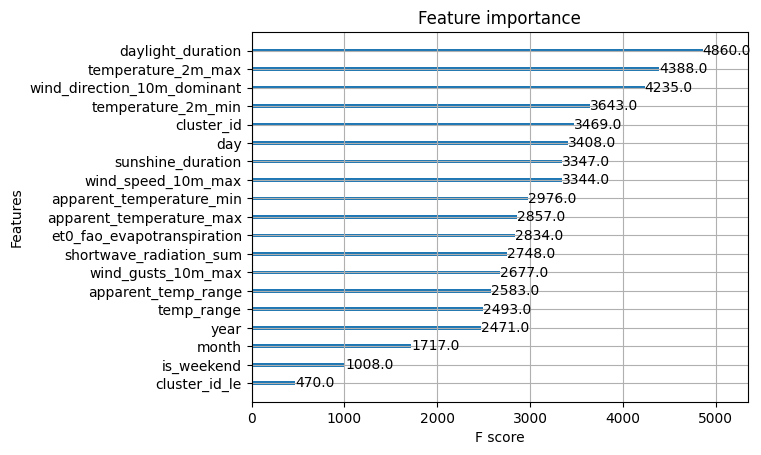

submission_xgb.csv saved.


In [113]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --- Feature Engineering konsisten ---
train['temp_range'] = train['temperature_2m_max'] - train['temperature_2m_min']
test['temp_range'] = test['temperature_2m_max'] - test['temperature_2m_min']

train['apparent_temp_range'] = train['apparent_temperature_max'] - train['apparent_temperature_min']
test['apparent_temp_range'] = test['apparent_temperature_max'] - test['apparent_temperature_min']

train['is_weekend'] = pd.to_datetime(train['date']).dt.dayofweek >= 5
test['is_weekend'] = pd.to_datetime(test['date']).dt.dayofweek >= 5
train['is_weekend'] = train['is_weekend'].astype(int)
test['is_weekend'] = test['is_weekend'].astype(int)

# pastikan cluster_id kategori
train['cluster_id'] = train['cluster_id'].astype('category')
test['cluster_id'] = test['cluster_id'].astype('category')

# --- handle missing ---
train.fillna(train.median(numeric_only=True), inplace=True)
test.fillna(test.median(numeric_only=True), inplace=True)

# --- handle outlier ---
for col in [
    'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max',
    'apparent_temperature_min', 'sunshine_duration', 'daylight_duration',
    'wind_speed_10m_max', 'wind_gusts_10m_max', 'shortwave_radiation_sum',
    'et0_fao_evapotranspiration'
]:
    q_low = train[col].quantile(0.01)
    q_high = train[col].quantile(0.99)
    train[col] = train[col].clip(lower=q_low, upper=q_high)
    test[col] = test[col].clip(lower=q_low, upper=q_high)

# --- feature selection ---
features = [
    col for col in train.columns
    if col not in ['ID', 'date', 'electricity_consumption']
]

# --- split ---
X_train, X_val, y_train, y_val = train_test_split(
    train[features], train['electricity_consumption'],
    test_size=0.2, random_state=42
)

# --- DMatrix dengan enable_categorical ---
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(test[features], enable_categorical=True)

# --- param ---
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# --- train ---
evallist = [(dtrain, 'train'), (dval, 'eval')]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evallist,
    early_stopping_rounds=50,
    verbose_eval=100
)

# --- validation ---
xgb_val_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, xgb_val_pred))
print(f'Validation RMSE: {rmse:.4f}')

# --- feature importance ---
xgb.plot_importance(model, max_num_features=20)
plt.show()

# --- predict test ---
xgb_test_pred = model.predict(dtest)

submission = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': xgb_test_pred
})
submission.to_csv('submission_xgb.csv', index=False)
print("submission_xgb.csv saved.")


# **ENSEMBLE: LGBM + CATBOOST + XGBOOST**

In [114]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# ensemble di validation
ensemble_val_avg = (lgbm_val_pred + cb_val_pred + xgb_val_pred) / 3
rmse_avg = np.sqrt(mean_squared_error(y_val, ensemble_val_avg))
print(f'Validation RMSE (Ensemble Average): {rmse_avg:.4f}')

# weighted ensemble di validation
ensemble_val_weighted = (
    0.2 * lgbm_val_pred +
    0.2 * xgb_val_pred +
    0.6 * cb_val_pred
)
rmse_weighted = np.sqrt(mean_squared_error(y_val, ensemble_val_weighted))
print(f'Validation RMSE (Ensemble Weighted): {rmse_weighted:.4f}')

# ensemble di test
ensemble_test_avg = (lgbm_test_pred + cb_test_pred + xgb_test_pred) / 3
ensemble_test_weighted = (
    0.2 * lgbm_test_pred +
    0.2 * xgb_test_pred +
    0.6 * cb_test_pred
)

# save ke submission
submission_avg = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': ensemble_test_avg
})
submission_avg.to_csv('submission_ensemble_avg.csv', index=False)

submission_weighted = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': ensemble_test_weighted
})
submission_weighted.to_csv('submission_ensemble_weighted.csv', index=False)

print("submission_ensemble_avg.csv dan submission_ensemble_weighted.csv saved.")


Validation RMSE (Ensemble Average): 23.6452
Validation RMSE (Ensemble Weighted): 23.6642
submission_ensemble_avg.csv dan submission_ensemble_weighted.csv saved.


# **ENSEMBLE: CATBOOST + LIGHTGBM**

In [115]:
# simple average ensemble
ensemble_val_pred = (lgbm_val_pred + cb_val_pred) / 2
rmse = np.sqrt(mean_squared_error(y_val, ensemble_val_pred))
print(f"Validation RMSE (Ensemble Average LGBM+CatBoost): {rmse:.4f}")

# weighted ensemble
ensemble_val_pred_w = 0.6 * lgbm_val_pred + 0.4 * cb_val_pred
rmse_w = np.sqrt(mean_squared_error(y_val, ensemble_val_pred_w))
print(f"Validation RMSE (Ensemble Weighted LGBM+CatBoost): {rmse_w:.4f}")

# predict on test set
ensemble_test_pred = (lgbm_test_pred + cb_test_pred) / 2

# submission
submission = pd.DataFrame({
    "ID": test_onehot['ID'],
    "electricity_consumption": ensemble_test_pred
})
submission.to_csv("submission_ensemble_lgbm_catboost.csv", index=False)

print("submission_ensemble_lgbm_catboost.csv saved.")


Validation RMSE (Ensemble Average LGBM+CatBoost): 23.6709
Validation RMSE (Ensemble Weighted LGBM+CatBoost): 23.7251
submission_ensemble_lgbm_catboost.csv saved.


# **ENSEMBLE: CATBOOST + XGBOOST**

In [116]:
# simple average ensemble
ensemble_val_pred = (xgb_val_pred + cb_val_pred) / 2
rmse = np.sqrt(mean_squared_error(y_val, ensemble_val_pred))
print(f"Validation RMSE (Ensemble Average XGB+CatBoost): {rmse:.4f}")

# weighted ensemble
ensemble_val_pred_w = 0.6 * xgb_val_pred + 0.4 * cb_val_pred
rmse_w = np.sqrt(mean_squared_error(y_val, ensemble_val_pred_w))
print(f"Validation RMSE (Ensemble Weighted XGB+CatBoost): {rmse_w:.4f}")

# predict on test set
ensemble_test_pred = (xgb_test_pred + cb_test_pred) / 2

# submission
submission = pd.DataFrame({
    "ID": test_onehot['ID'],
    "electricity_consumption": ensemble_test_pred
})
submission.to_csv("submission_ensemble_xgb_catboost.csv", index=False)

print("submission_ensemble_xgb_catboost.csv saved.")


Validation RMSE (Ensemble Average XGB+CatBoost): 23.8098
Validation RMSE (Ensemble Weighted XGB+CatBoost): 23.8612
submission_ensemble_xgb_catboost.csv saved.


# **ENSEMBLE: LGBM + XGBOOST**

In [117]:
# simple average ensemble
ensemble_val_pred = (xgb_val_pred + lgbm_val_pred) / 2
rmse = np.sqrt(mean_squared_error(y_val, ensemble_val_pred))
print(f"Validation RMSE (Ensemble Average XGB+LGBM): {rmse:.4f}")

# weighted ensemble
ensemble_val_pred_w = 0.6 * xgb_val_pred + 0.4 * lgbm_val_pred
rmse_w = np.sqrt(mean_squared_error(y_val, ensemble_val_pred_w))
print(f"Validation RMSE (Ensemble Weighted XGB+LGBM): {rmse_w:.4f}")

# predict on test set
ensemble_test_pred = (xgb_test_pred + lgbm_test_pred) / 2

# submission
submission = pd.DataFrame({
    "ID": test_onehot['ID'],
    "electricity_consumption": ensemble_test_pred
})
submission.to_csv("submission_ensemble_xgb_lgbm.csv", index=False)

print("submission_ensemble_xgb_lgbm.csv saved.")


Validation RMSE (Ensemble Average XGB+LGBM): 24.0564
Validation RMSE (Ensemble Weighted XGB+LGBM): 24.0779
submission_ensemble_xgb_lgbm.csv saved.


# **STACKING ENSEMBLE: CB + LGBM + XGB + META (Ridge)**

In [122]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

# fitur
features = [col for col in train_onehot.columns if col not in ['ID', 'date', 'electricity_consumption', 'cluster_id']]

X = train_onehot[features]
y = train_onehot['electricity_consumption']
X_test = test_onehot[features]

# train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
lgbm = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42
)

cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    early_stopping_rounds=50,
    random_seed=42
)

xgbr = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    enable_categorical=True,
    random_state=42
)

# Meta model
meta_model = RidgeCV()

# Stacking regressor
stack = StackingRegressor(
    estimators=[
        ('lgbm', lgbm),
        ('cat', cat),
        ('xgb', xgbr)
    ],
    final_estimator=meta_model,
    passthrough=True,   # bisa juga False kalau mau
    cv=5,
    n_jobs=-1
)

# fit
stack.fit(X_train, y_train)

# validation
val_pred = stack.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print(f"Validation RMSE (Stacking): {rmse:.4f}")

# predict on test
test_pred = stack.predict(X_test)
submission = pd.DataFrame({
    "ID": test_onehot["ID"],
    "electricity_consumption": test_pred
})
submission.to_csv("submission_stacking.csv", index=False)
print("submission_stacking.csv saved.")


Validation RMSE (Stacking): 23.4228
submission_stacking.csv saved.


# **DEEP LEARNING: MLP**

In [120]:
!pip install tensorflow

In [121]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# fitur
features = [col for col in train_onehot.columns if col not in ['ID', 'date', 'electricity_consumption', 'cluster_id']]

X = train_onehot[features]
y = train_onehot['electricity_consumption']
X_test = test_onehot[features]

# split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# normalisasi (penting untuk deep learning)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# define MLP
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError()]
)

# train
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ],
    verbose=2
)

# evaluate
mlp_val_pred = model.predict(X_val_scaled).flatten()
rmse = np.sqrt(mean_squared_error(y_val, mlp_val_pred))
print(f"Validation RMSE (MLP): {rmse:.4f}")

# predict test
mlp_test_pred = model.predict(X_test_scaled).flatten()

# submission
submission = test_onehot[['ID']].copy()
submission['electricity_consumption'] = mlp_test_pred
submission.to_csv('submission_mlp.csv', index=False)
print("submission_mlp.csv saved.")


Epoch 1/100
293/293 - 8s - 27ms/step - loss: 239960.1875 - root_mean_squared_error: 489.8573 - val_loss: 25302.9863 - val_root_mean_squared_error: 159.0691
Epoch 2/100
293/293 - 3s - 10ms/step - loss: 23207.6445 - root_mean_squared_error: 152.3406 - val_loss: 7442.0913 - val_root_mean_squared_error: 86.2676
Epoch 3/100
293/293 - 7s - 25ms/step - loss: 14194.6631 - root_mean_squared_error: 119.1414 - val_loss: 4012.7976 - val_root_mean_squared_error: 63.3466
Epoch 4/100
293/293 - 4s - 12ms/step - loss: 12415.3232 - root_mean_squared_error: 111.4241 - val_loss: 3067.5715 - val_root_mean_squared_error: 55.3857
Epoch 5/100
293/293 - 3s - 11ms/step - loss: 11839.5664 - root_mean_squared_error: 108.8098 - val_loss: 2660.8682 - val_root_mean_squared_error: 51.5836
Epoch 6/100
293/293 - 4s - 13ms/step - loss: 11441.3301 - root_mean_squared_error: 106.9641 - val_loss: 2395.9062 - val_root_mean_squared_error: 48.9480
Epoch 7/100
293/293 - 3s - 11ms/step - loss: 10901.4521 - root_mean_squared_err